In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
cv2.imread("C:/Users/aarek/OneDrive/Desktop/menswear/train/Trousers/30-hltr004082-highlander-original-imafpchr9cvjh4ta (1).jpeg").shape

(737, 553, 3)

In [3]:
train= ImageDataGenerator(rescale=1/255)
validation= ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset=train.flow_from_directory("C:/Users/aarek/OneDrive/Desktop/menswear/train/",
                                        target_size=(150,150),
                                        batch_size=3,
                                        class_mode='binary')

validation_dataset=train.flow_from_directory("C:/Users/aarek/OneDrive/Desktop/menswear/validation/",
                                        target_size=(150,150),
                                        batch_size=3,
                                        class_mode='binary')

Found 147 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'Trousers': 0, 'jeans': 1}

In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),

  
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=0.001),
             #optimizer=Adam(),
             metrics=['accuracy'])

In [9]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=10,
                   epochs=20,
                   validation_data=validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 14 steps
Epoch 1/20
10/10 [==============================] - 2s 249ms/step - loss: 0.8279 - accuracy: 0.4667 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 2s 171ms/step - loss: 0.7008 - accuracy: 0.5667 - val_loss: 0.7206 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 2s 160ms/step - loss: 0.7030 - accuracy: 0.4667 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 2s 157ms/step - loss: 0.6874 - accuracy: 0.5667 - val_loss: 0.6862 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 2s 183ms/step - loss: 0.6847 - accuracy: 0.5000 - val_loss: 0.6733 - val_accuracy: 0.5500
Epoch 6/20
10/10 [==============================] - 2s 159ms/step - loss: 0.6304 - accuracy: 0.7667 - val_loss: 0.6596 - val_accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 2s 1

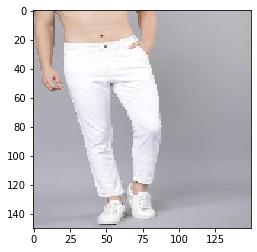

Trouser


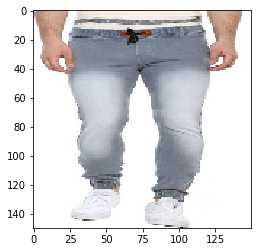

Jeans


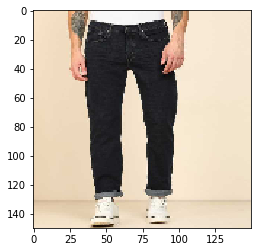

Jeans


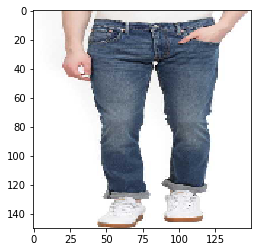

Jeans


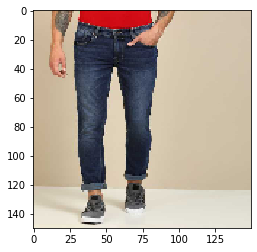

Jeans


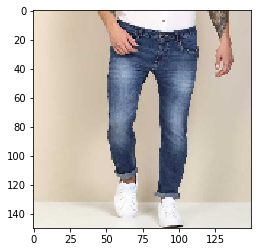

Jeans


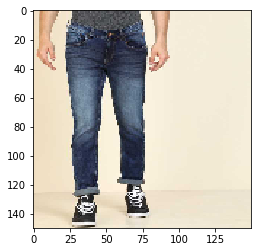

Jeans


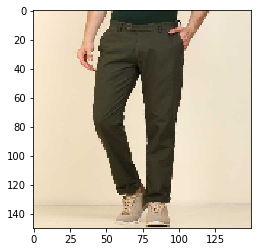

Jeans


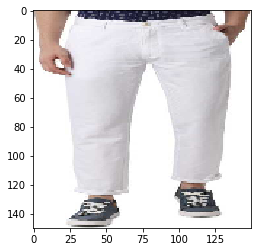

Trouser


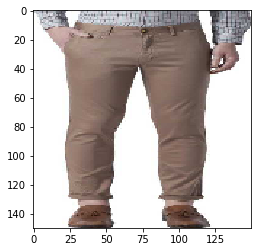

Trouser


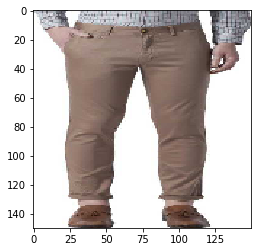

Trouser


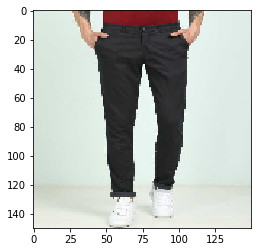

Trouser


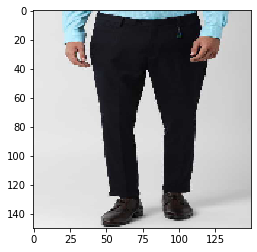

Jeans


In [10]:
dir_path=('C:/Users/aarek/OneDrive/Desktop/menswear/test/')

for i in os.listdir(dir_path):
    pic=image.load_img(dir_path+'//'+ i,target_size=(150,150))
    plt.imshow(pic)
    plt.show()
    
    X= image.img_to_array(pic)
    X= np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    
    if val==0:
        print("Trouser")
    else:
        print("Jeans")